Check Facial detection on a  single image

29 19 168 168


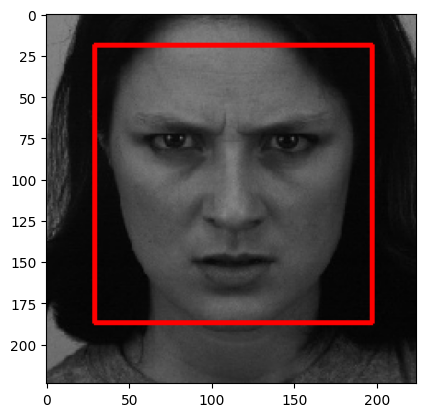

In [2]:
import cv2
import dlib
import matplotlib.pyplot as plt

# Load the Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(r"archive\Cascades\haarcascade_frontalface_default.xml")

# Load the Dlib shape predictor for facial landmarks
predictor = dlib.shape_predictor(r"archive\Cascades\shape_predictor_68_face_landmarks.dat")
image_path = r"archive\fer_ckplus_kdef\anger\AF01ANS.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces using the Haar Cascade classifier
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30,30))

for (x, y, w, h) in faces:
    print(x,y,w,h)
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0),  2)

# Display the result
plt.imshow(image)
plt.show()

Check points detection on single image

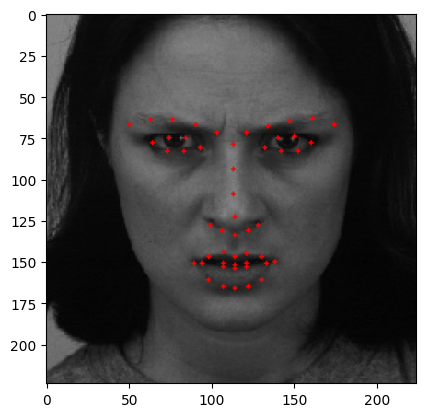

In [3]:
# Load the Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(r'archive\Cascades\haarcascade_frontalface_default.xml')

# Load the Dlib shape predictor for facial landmarks
predictor = dlib.shape_predictor(r"archive\Cascades\shape_predictor_68_face_landmarks.dat")
image_path = r"archive\fer_ckplus_kdef\anger\AF01ANS.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces using the Haar Cascade classifier
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(0,0))


for (x,y,w,h) in faces:
    face = dlib.rectangle(x, y, x + w, y + h)
    # Get the facial landmarks
    landmarks = predictor(gray, face)
    # Extract X and Y coordinates for landmarks
    landmarks_list = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(17, 68)]

    # Draw points on the face
    for (x, y) in landmarks_list:
        cv2.circle(image, (x, y), 1, (255, 0, 0), -1)
    

# Display the result
plt.imshow(image)
plt.show()

Marks on cropped face

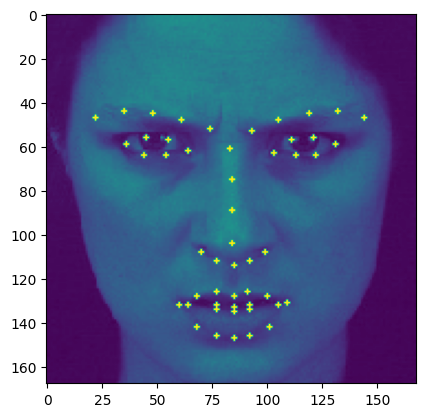

In [4]:
# Load the Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(r'archive\Cascades\haarcascade_frontalface_default.xml')

# Load the Dlib shape predictor for facial landmarks
predictor = dlib.shape_predictor(r"archive\Cascades\shape_predictor_68_face_landmarks.dat")
image_path = r"archive\fer_ckplus_kdef\anger\AF01ANS.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces using the Haar Cascade classifier
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(0,0))


for (x,y,w,h) in faces:
    face = dlib.rectangle(x, y, x + w, y + h)
    # Extracting Region of interest
    face_roi = gray[y:y + h, x:x + w]
    h,w = face_roi.shape
    face = dlib.rectangle(0, 0, w, h)
    # Get the facial landmarks
    landmarks = predictor(face_roi, face)
    # Extract X and Y coordinates for landmarks
    landmarks_list = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(17, 68)]

    # Draw points on the face
    for (x, y) in landmarks_list:
        cv2.circle(face_roi, (x, y), 1, (255, 0, 0), -1)
    

# Display the result
plt.imshow(face_roi)
plt.show()

Check Generated CSV File

In [5]:
import pandas as pd
df = pd.read_csv("facial_landmarks_with_distances.csv")
df

,Category,Distance_0_1,Distance_0_2,Distance_0_3,Distance_0_4,Distance_0_5,Distance_0_6,Distance_0_7,Distance_0_8,Distance_0_9,...,Distance_46_47,Distance_46_48,Distance_46_49,Distance_46_50,Distance_47_48,Distance_47_49,Distance_47_50,Distance_48_49,Distance_48_50,Distance_49_50
0,anger,13.341664,27.018512,40.049969,53.235327,71.344236,83.024093,96.005208,109.073370,123.000000,...,14.000000,2.236068,5.830952,13.152946,13.152946,19.235384,27.073973,6.082763,14.000000,8.062258
1,anger,12.649111,26.305893,38.052595,52.086467,75.059976,85.005882,97.082439,109.165013,120.037494,...,13.038405,1.000000,7.280110,14.035669,13.000000,20.024984,27.000000,7.071068,14.000000,7.071068
2,anger,13.038405,26.248809,38.639358,53.084838,76.026311,86.209048,98.412398,109.293184,118.016948,...,13.341664,4.000000,6.403124,13.601471,13.038405,18.027756,26.019224,5.000000,13.000000,8.000000
3,anger,12.083046,25.495098,38.052595,51.039201,75.059976,86.005814,98.127468,111.072049,122.004098,...,15.000000,1.000000,7.280110,16.031220,15.033296,22.090722,31.016125,7.071068,16.000000,9.055385
4,anger,12.649111,26.305893,40.012498,55.145263,75.026662,89.050547,103.174609,118.152444,132.003788,...,16.000000,1.000000,8.544004,16.031220,16.031220,24.186773,32.015621,8.246211,16.000000,8.246211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14330,surprise,17.029386,33.286634,47.169906,61.814238,103.484298,119.364986,135.484316,150.651917,161.003106,...,12.529964,8.000000,10.630146,17.888544,17.804494,23.021729,30.413813,8.062258,16.000000,8.062258
14331,surprise,17.804494,33.600595,48.466483,63.150614,110.652610,126.289350,143.544418,158.808060,169.011834,...,15.811388,4.123106,8.544004,17.464249,18.357560,24.351591,33.241540,7.071068,16.000000,9.055385
14332,surprise,17.029386,34.132096,48.083261,64.381674,92.265920,108.903627,126.150704,142.506140,154.003247,...,18.439089,9.000000,11.401754,18.027756,14.317821,21.213203,29.068884,7.000000,15.033296,8.062258
14333,surprise,18.439089,35.805028,50.695167,67.268120,97.739450,116.400172,134.495353,150.748134,162.012345,...,16.124515,4.000000,8.944272,17.464249,18.439089,25.059928,33.241540,8.000000,17.000000,9.000000


In [6]:
df.shape

(14335, 1276)

In [33]:
df1 = df.groupby("Category").mean()
df1

,Distance_0_1,Distance_0_2,Distance_0_3,Distance_0_4,Distance_0_5,Distance_0_6,Distance_0_7,Distance_0_8,Distance_0_9,Distance_0_10,...,Distance_46_47,Distance_46_48,Distance_46_49,Distance_46_50,Distance_47_48,Distance_47_49,Distance_47_50,Distance_48_49,Distance_48_50,Distance_49_50
Category,,,,,,,,,,,,,,,,,,,,,
anger,14.474709,28.992144,43.226893,57.872514,83.985615,98.581791,114.025791,129.210177,141.061461,72.116720,...,18.079420,7.343010,11.648775,19.009352,18.946765,26.551679,35.079828,8.049254,16.854457,8.925749
contempt,16.167979,32.138953,47.772338,63.610058,93.861321,110.171954,127.119704,143.360685,155.116650,79.708486,...,20.959748,4.728260,11.014983,20.148237,21.760266,30.553786,40.273534,9.150120,18.981075,9.940498
disgust,15.184411,30.544450,45.657687,61.106933,88.360467,104.173936,121.021911,137.409143,149.972908,75.423682,...,19.163584,6.053554,11.920871,20.863777,19.569442,28.683897,38.647629,9.433601,19.573188,10.271145
fear,14.480213,28.885548,42.875060,56.829494,85.788562,100.840159,116.467770,131.171341,142.012618,72.292705,...,19.126227,7.607016,11.770446,19.129069,19.536527,27.291538,35.944652,8.110934,17.016556,8.999755
happiness,14.557088,28.889556,42.835741,56.691464,87.746082,102.187622,117.481021,132.143950,143.092811,73.603585,...,23.740876,8.768009,14.343771,23.178151,25.044941,34.904928,45.291765,10.235439,21.188700,11.094228
neutrality,14.659817,29.155873,43.227804,57.402157,86.810963,101.712314,117.377133,132.396972,143.677961,73.691454,...,18.156274,5.420097,10.286249,18.070140,19.065535,26.645353,35.146345,7.978551,16.648216,8.771749
sadness,14.628669,29.265188,43.686695,58.061037,86.033379,101.004896,116.720597,131.584908,143.119970,73.260469,...,18.304223,5.820105,10.545579,18.338594,19.094153,26.725687,35.343994,8.042105,16.857143,8.924451
surprise,14.623254,28.816236,42.189991,55.631596,87.504948,102.196915,117.662141,132.022315,142.223977,72.959476,...,18.295883,10.305192,13.437866,19.416613,18.764144,25.775322,33.703235,7.483718,15.811828,8.428225


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import joblib

# Load the CSV file containing facial landmarks with distances
data = pd.read_csv("facial_landmarks_with_distances.csv")

# Extract features (X) and labels (y)
X = data.drop("Category", axis=1)
y = data["Category"]

# Normalize the feature data (X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=10)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel="linear", C=1.0)  # You can adjust the kernel and hyperparameters
svm_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average= "weighted")

print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Save the models to files
joblib.dump(svm_classifier, 'svm_model.joblib')
joblib.dump(pca, 'pca_model.joblib')

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
# Load the CSV file containing facial landmarks with distances
data = pd.read_csv("facial_landmarks_with_distances.csv")

# Extract features (X) and labels (y)
X = data.drop("Category", axis=1)
y = data["Category"]

# Normalize the feature data (X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=10)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [6]:
# Train an SVM classifier
svm_classifier = SVC(kernel="linear", C=1.0)  # You can adjust the kernel and hyperparameters
svm_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average= "weighted")

print("F1 Score:", f1)
print("Accuracy:", accuracy)

F1 Score: 0.4360655037056841
Accuracy: 0.5043599581444018


In [5]:
X_train_pca.shape

(11468, 10)

In [ ]:
# Save the models to files
joblib.dump(svm_classifier, 'svm_model.joblib')
joblib.dump(pca, 'pca_model.joblib')

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
#import joblib

# Load the CSV file containing facial landmarks with distances
data = pd.read_csv("facial_landmarks_with_distances.csv")

# Extract features (X) and labels (y)
X = data.drop("Category", axis=1)
y = data["Category"]
y = y.values
# Normalize the feature data (X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
y_encoded = encoder.fit_transform(y.reshape(-1,1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

"""# Perform PCA to reduce dimensionality (adjust the number of components based on your needs)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)"""

# Build a small 4-layer neural network
model = Sequential()
model.add(Dense(512, input_dim=1275, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the neural network
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_test_decoded = [y.argmax() for y in y_test]
y_pred_decoded = [y.argmax() for y in y_pred]
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
f1 = f1_score(y_test_decoded, y_pred_decoded, average="weighted")

print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Save the model to a file
model.save('nn_model.h5')
#joblib.dump(pca, 'pca_model.joblib')

c:\Users\HP\Documents\GitHub\Interactive-Visualization-FAU-Project\Virtualenv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
359/359 [==============================] - 3s 6ms/step - loss: 1.5282 - accuracy: 0.4522 - val_loss: 1.3726 - val_accuracy: 0.5183
Epoch 2/50
359/359 [==============================] - 2s 6ms/step - loss: 1.3339 - accuracy: 0.5186 - val_loss: 1.3351 - val_accuracy: 0.5190
Epoch 3/50
359/359 [==============================] - 2s 6ms/step - loss: 1.2800 - accuracy: 0.5389 - val_loss: 1.2868 - val_accuracy: 0.5396
Epoch 4/50
359/359 [==============================] - 2s 6ms/step - loss: 1.2348 - accuracy: 0.5541 - val_loss: 1.2797 - val_accuracy: 0.5584
Epoch 5/50
359/359 [==============================] - 2s 6ms/step - loss: 1.1972 - accuracy: 0.5712 - val_loss: 1.2675 - val_accuracy: 0.5619
Epoch 6/50
359/359 [==============================] - 2s 6ms/step - loss: 1.1546 - accuracy: 0.5846 - val_loss: 1.2012 - val_accuracy: 0.5710
Epoch 7/50
359/359 [==============================] - 2s 6ms/step - loss: 1.1345 - accuracy: 0.5905 - val_loss: 1.1513 - val_accuracy: 0.5863
Epoch 

c:\Users\HP\Documents\GitHub\Interactive-Visualization-FAU-Project\Virtualenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
